In [84]:
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [45]:
sampling_freq = 10e3
N = 1e5
signal_freq = 0.25
carrier_freq = 3e3

In [46]:
carrier_amp = 2 * np.sqrt(2) ; carrier_amp

2.8284271247461903

In [47]:
time = np.arange(N) / float(sampling_freq) ;time

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 9.9997e+00, 9.9998e+00,
       9.9999e+00])

In [48]:
noise_power = 0.01 * sampling_freq / 2; noise_power

50.0

In [49]:
orig_signal = 500* np.cos(2*np.pi* signal_freq* time) #2pi f t

In [50]:
carrier = carrier_amp * np.sin(2*np.pi* carrier_freq *time + orig_signal)

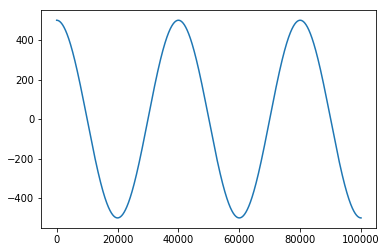

In [51]:
plt.plot(orig_signal)

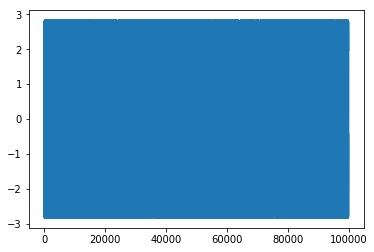

In [52]:
plt.plot(carrier)

In [53]:
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
y = orig_signal + noise

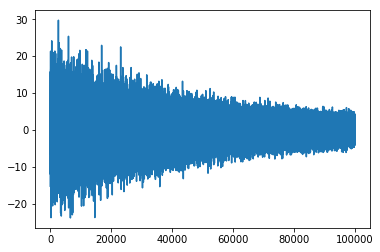

In [54]:
plt.plot(x)

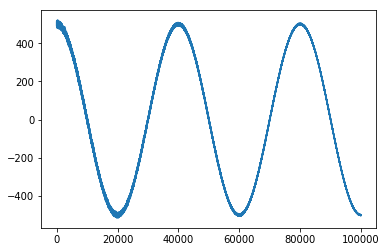

In [55]:
plt.plot(y)

[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350.
 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950.
 3000. 3050. 3100. 3150. 3200. 3250. 3300. 3350. 3400. 3450. 3500. 3550.
 3600. 3650. 3700. 3750. 3800. 3850. 3900. 3950. 4000. 4050. 4100. 4150.
 4200. 4250. 4300. 4350. 4400. 4450. 4500. 4550. 4600. 4650. 4700. 4750.
 4800. 4850. 4900. 4950. 5000.] [ 0.    0.01  0.02 ...  9.98  9.99 10.  ]


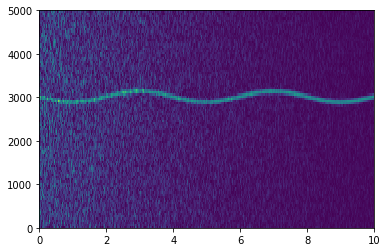

In [86]:
#recovered carrier
length_of_segment = 200
sample_freq, segment_time, stft = signal.stft(x, sampling_freq, nperseg= length_of_segment)
print(sample_freq, segment_time)
plt.pcolormesh(segment_time, sample_freq, np.abs(stft), vmin=0, vmax=carrier_amp)

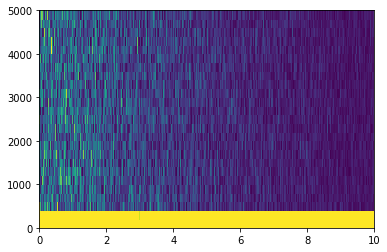

In [80]:
#recovered signal
f, t, Zxx = signal.stft(y, sampling_freq, nperseg=50)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=carrier_amp)

In [87]:
np.abs(stft).shape

(101, 1001)

In [22]:
stft

array([[ 0.26008311+0.j        , -1.2779284 +0.j        ,
         0.71635531+0.j        , ..., -0.17517722+0.j        ,
        -0.05674619+0.j        ,  0.05257708+0.j        ],
       [-0.34088   -0.00676566j,  1.09414703-0.27807955j,
        -0.84650263+0.18866721j, ...,  0.08713833-0.00989107j,
         0.0350835 +0.10119533j, -0.01746487-0.06191503j],
       [ 0.36929324-0.14249175j, -0.56350977+0.64333629j,
         0.49547853-0.37141986j, ...,  0.01585478-0.02800255j,
         0.02938233-0.04231152j, -0.05745294+0.06481987j],
       ...,
       [-0.55423229+0.02960896j,  0.3283968 -0.3835494j ,
        -1.25524623-0.68699039j, ...,  0.13208638-0.02049198j,
         0.04198257-0.06517366j, -0.15592984+0.04314622j],
       [ 0.08605975-0.5840725j , -1.38555541+0.637392j  ,
         1.25350891+0.19779303j, ..., -0.0911933 -0.02569146j,
        -0.10872627-0.04268691j,  0.08967261+0.05157027j],
       [ 0.57464198+0.j        ,  2.23587256+0.j        ,
        -0.77148854+0.j       

### Frequency Modulation

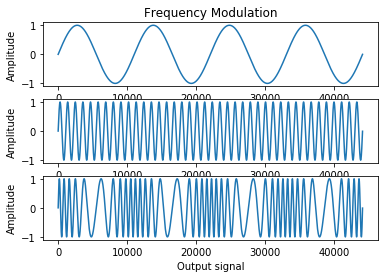

In [13]:
modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

time = np.arange(44100.0) / 44100.0
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

In [27]:
time

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])